In [1]:
#Importing necessary libraries.

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.densenet import DenseNet121
from numpy import load
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [2]:
#Loading the training, testing and validation data

traindir = r"...input/directory-name"
validdir = r"...input/directory-name"
testdir = r"...input/directory-name"

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

In [4]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#Getting a basic summary of our training, testing and validation data.

In [5]:
batch_size = 64

training_set = train_datagen.flow_from_directory(traindir,
                                                 target_size=(255, 255),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

Found 70295 images belonging to 38 classes.


In [6]:
valid_set = valid_datagen.flow_from_directory(validdir,
                                              target_size=(255, 255),
                                              batch_size=batch_size,
                                              class_mode='categorical')

Found 17572 images belonging to 38 classes.


In [7]:
class_dict = training_set.class_indices
li = list(class_dict.keys())

38


In [8]:
train_num = training_set.samples
valid_num = valid_set.samples

In [ ]:
#Loading our CNN model. The model makes use of the DenseNet121 architecture. Dense121, also known as DenseNet-121, is a deep convolutional neural network 
#architecture that is part of the DenseNet family. DenseNet is characterized by its dense connectivity pattern, where each layer is directly connected to 
#every other layer in a feed-forward fashion. DenseNet-121 specifically refers to a version of the DenseNet architecture that has 121 layers. It is widely 
#used in computer vision tasks, such as image classification, object detection, and segmentation, due to its ability to efficiently capture feature 
#representations and handle vanishing gradient issues. DenseNet-121 has demonstrated strong performance on various image datasets and is widely used as a 
#pre-trained model for transfer learning in many computer vision applications. 

In [9]:
base_model=DenseNet121(include_top=False, input_shape=(255,255,3), weights='imagenet')
base_model.trainable=False

Metal device set to: Apple M1


2022-01-26 16:36:38.122353: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-26 16:36:38.122451: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
classifier = models.Sequential()

classifier.add(base_model)
classifier.add(layers.Flatten())
classifier.add(layers.Dense(38, activation='softmax'))
classifier.summary()

#The last dense layer represents the number of disease classes. In case you want to train on lesser or more 
#classes, make sure to update the number of classes here too.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 8, 8, 1024)        7037504   
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 38)                2490406   
Total params: 9,527,910
Trainable params: 2,490,406
Non-trainable params: 7,037,504
_________________________________________________________________


In [ ]:
#Learning rate callback

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.001)

In [12]:
opt = tf.keras.optimizers.Adam()

classifier.compile(optimizer=opt,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [13]:
history = classifier.fit(training_set,
                         steps_per_epoch=1099,
                         validation_data=valid_set,
                         validation_steps=275,
                         callbacks = [reduce_lr],
                         epochs=30)

2022-01-26 16:36:39.896821: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-26 16:36:39.896940: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/30


2022-01-26 16:36:41.162822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1099/1099 [==============================] - ETA: 0s - loss: 1.9974 - accuracy: 0.8294

2022-01-26 16:59:22.201678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1099/1099 [==============================] - 2277s 2s/step - loss: 1.9974 - accuracy: 0.8294 - val_loss: 1.3418 - val_accuracy: 0.9067
Epoch 2/30
1099/1099 [==============================] - 1495s 1s/step - loss: 1.4142 - accuracy: 0.9068 - val_loss: 1.0423 - val_accuracy: 0.9408
Epoch 3/30
1099/1099 [==============================] - 1677s 2s/step - loss: 1.4012 - accuracy: 0.9238 - val_loss: 1.6073 - val_accuracy: 0.9280
Epoch 4/30
1099/1099 [==============================] - 1823s 2s/step - loss: 1.3430 - accuracy: 0.9351 - val_loss: 1.4693 - val_accuracy: 0.9416
Epoch 5/30
1099/1099 [==============================] - 1758s 2s/step - loss: 1.3348 - accuracy: 0.9407 - val_loss: 1.0349 - val_accuracy: 0.9601
Epoch 6/30
1099/1099 [==============================] - 1748s 2s/step - loss: 1.3220 - accuracy: 0.9455 - val_loss: 1.6134 - val_accuracy: 0.9450
Epoch 7/30
1099/1099 [==============================] - 1759s 2s/step - loss: 1.3371 - accuracy: 0.9496 - val_loss: 1.0453 - val_accura

In [ ]:
#Plotting our model's accuracy, loss, validation accuracy and validation loss.

In [14]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

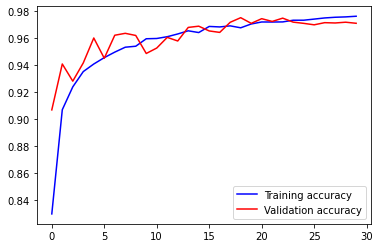

In [15]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.legend()

In [ ]:
#Saving our model.

In [16]:
filepath = r"/Users/aaryanmehta/Desktop/Aaryan/archive/Plant_Disease_Model_DenseNet121.h5"

In [17]:
classifier.save(filepath)